SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sys import path
path.append('../../heston/')
path.append('../../sabr/')

In [2]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

## SABR calibration example

In [3]:
#sabr model parameters
alpha = 0.2
v = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([alpha, v, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [4]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [5]:
c0, iv0 = sabr_0( Kn, F, T )

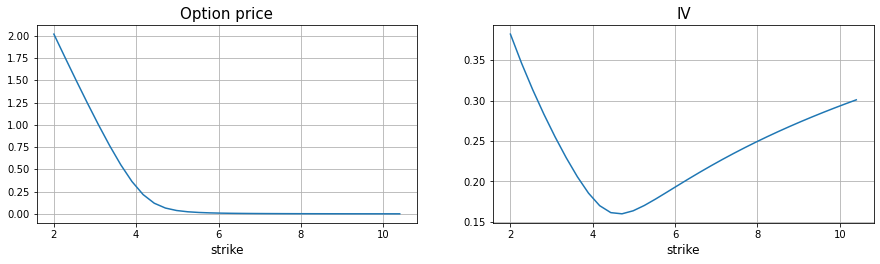

In [6]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [7]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

 23%|█████████▍                               | 23/100 [00:00<00:00, 819.14it/s]


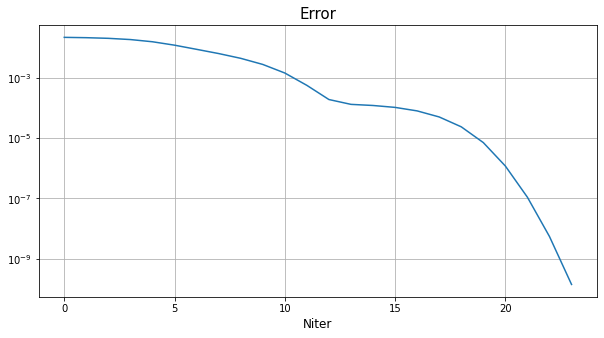

In [8]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [9]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.2  0.9  0.9 -0.5]


In [10]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [11]:
c1 - c0

array([ 6.81632528e-12,  4.85744778e-12,  1.52455826e-12, -3.35553807e-12,
       -9.70556968e-12, -1.68078884e-11, -2.26005881e-11, -2.30859776e-11,
       -1.45448098e-11, -1.06203935e-12,  7.34334815e-12,  9.00152175e-12,
        7.74541542e-12,  5.96450667e-12,  4.41019443e-12,  3.20479754e-12,
        2.30254704e-12,  1.63164621e-12,  1.13130338e-12,  7.54958596e-13,
        4.69624339e-13,  2.51111631e-13,  8.25554902e-14, -4.83953155e-14,
       -1.50778695e-13, -2.31190067e-13, -2.94566455e-13, -3.44519552e-13,
       -3.84036553e-13, -4.15183513e-13, -4.39658726e-13, -4.58818747e-13])

In [12]:
iv1 - iv0

array([ 2.51700882e-11,  1.27519106e-11,  2.91250357e-12, -4.76296780e-12,
       -1.04768971e-11, -1.42071910e-11, -1.56278879e-11, -1.40217560e-11,
       -8.68302652e-12, -7.19507787e-13,  6.38897268e-12,  1.06452902e-11,
        1.25310873e-11,  1.29822264e-11,  1.26123556e-11,  1.17570398e-11,
        1.05995213e-11,  9.24316179e-12,  7.75154940e-12,  6.16476314e-12,
        4.50900428e-12,  2.80281354e-12,  1.06051279e-12, -7.08488823e-13,
       -2.49672505e-12, -4.29872804e-12, -6.10839157e-12, -7.92294008e-12,
       -9.73959802e-12, -1.15551457e-11, -1.33685285e-11, -1.51784141e-11])

In [13]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.1
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [14]:
#heston model object
heston = Heston(heston_params, r)

In [15]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

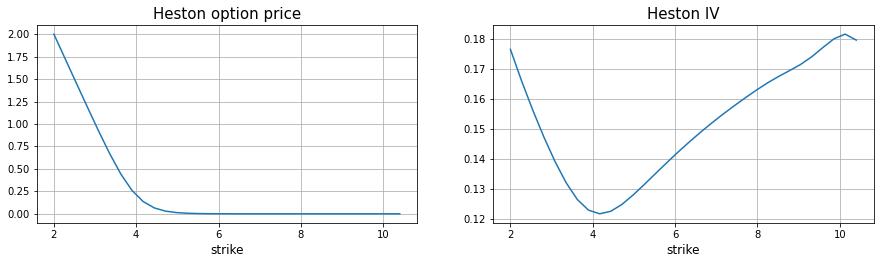

In [16]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 966.01it/s]


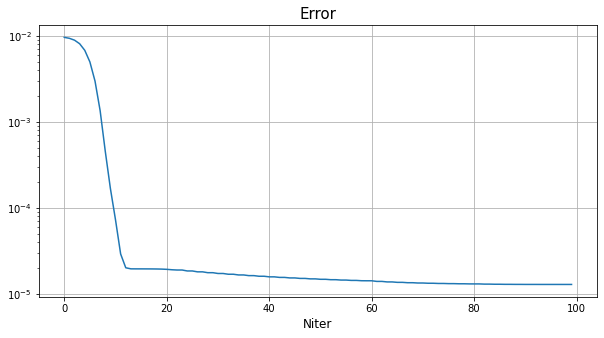

In [17]:
#calibrating sabr to heston
fs = sabr_calib.fit_price(ch, Kn, F, T, typ=True, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [18]:
sabr_calib.sabr_params

array([ 0.12077724,  0.40205003,  0.99984554, -0.10330884])

In [19]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

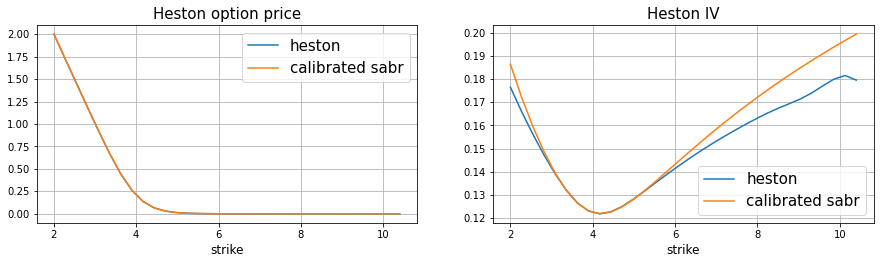

In [20]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [21]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [22]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0119%,
error in iv = 5.4013%
